# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:    
    print("Experiment with LR = %.6f" % (lr))
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizers = {
        'SGD': keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM),
        'RMSprop': keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0),
        'Adagrad': keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
        'Adadelta': keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    }
    
    for optimizer in optimizers:
        print(f'Experiment with {optimizer}')
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers[optimizer])
        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f'exp-lr-{str(lr)}-{optimizer}'
        results[exp_name_tag] = {
            'train-loss': train_loss,
            'valid-loss': valid_loss,
            'train-acc': train_acc,
            'valid-acc': valid_acc
        }

W0804 16:49:58.722953 11364 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0804 16:49:58.723917 11364 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 16:49:58.742866 11364 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 16:49:58.743864 11364 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 16:49:58.746855 11364 deprecation_

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with SGD


W0804 16:49:58.997219 11364 deprecation.py:323] From D:\Software\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.0884 - acc: 0.2241 - val_loss: 1.9354 - val_acc: 0.2720
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9297 - acc: 0.2776 - val_loss: 1.9337 - val_acc: 0.2749
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8953 - acc: 0.2988 - val_loss: 1.9165 - val_acc: 0.2922
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8813 - acc: 0.3082 - val_loss: 1.8740 - val_acc: 0.3228
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9340 - acc: 0.2822 - val_loss: 1.9851 - val_acc: 0.2874
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9486 - acc: 0.2742 - val_loss: 1.9317 - val_acc: 0.2856
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9632 - acc: 0.2678 - val_loss: 1.9639 - val_ac

50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 4s 79us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 4s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [=======

50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 4s 77us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [=======

50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 4s 85us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 1.2322 - acc: 0.5662 - val_loss: 1.3856 - val_acc: 0.5156
Epoch 27/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2233 - acc: 0.5688 - val_loss: 1.3520 - val_acc: 0.5169
Epoch 28/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2277 - acc: 0.5679 - val_loss: 1.3386 - val_acc: 0.5287
Epoch 29/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.1920 - acc: 0.5823 - val_loss: 1.3584 - val_acc: 0.5171
Epoch 30/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1814 - acc: 0.5833 - val_loss: 1.3439 - val_acc: 0.5290
Epoch 31/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.1737 - acc: 0.5862 - val_loss: 1.3702 - val_acc: 0.5202
Epoch 32/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.1721 - acc: 0.5857 - val_loss: 1.3424 - val_acc: 0.5281
Epoch 33/50
50000/50000 [=====================

Epoch 35/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.0162 - acc: 0.6387 - val_loss: 1.6529 - val_acc: 0.5058
Epoch 36/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.0028 - acc: 0.6437 - val_loss: 1.5957 - val_acc: 0.4966
Epoch 37/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.9879 - acc: 0.6460 - val_loss: 1.8388 - val_acc: 0.4516
Epoch 38/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.9719 - acc: 0.6523 - val_loss: 1.6853 - val_acc: 0.4905
Epoch 39/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.9565 - acc: 0.6594 - val_loss: 1.9269 - val_acc: 0.4477
Epoch 40/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.9391 - acc: 0.6617 - val_loss: 1.7886 - val_acc: 0.5024
Epoch 41/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.9303 - acc: 0.6689 - val_loss: 1.9673 - val_acc: 0.4740
Epoch 42/50
50000/50000 [=========

Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3313 - acc: 0.8946 - val_loss: 2.3824 - val_acc: 0.5172
Epoch 45/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3275 - acc: 0.8961 - val_loss: 2.3661 - val_acc: 0.5179
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3231 - acc: 0.8978 - val_loss: 2.4011 - val_acc: 0.5147
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3198 - acc: 0.8993 - val_loss: 2.3945 - val_acc: 0.5190
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3173 - acc: 0.9002 - val_loss: 2.4214 - val_acc: 0.5169
Epoch 49/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3134 - acc: 0.9020 - val_loss: 2.4366 - val_acc: 0.5175
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3097 - acc: 0.9021 - val_loss: 2.4203 - val_acc: 0.5169
Experiment with Adadelta
Train on 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3484 - acc: 0.1085 - val_loss: 2.2932 - val_acc: 0.1359
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2698 - acc: 0.1598 - val_loss: 2.2551 - val_acc: 0.1805
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2412 - acc: 0.1905 - val_loss: 2.2319 - val_acc: 0.2011
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2209 - acc: 0.2081 - val_loss: 2.2136 - val_acc: 0.2189
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2042 - acc: 0.2187 - val_loss: 2.1979 - val_acc: 0.2269
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1895 - acc: 0.2284 - val_loss: 2.1838 - val_acc: 0.2351
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1759 - acc: 0.2365 - val_loss: 2.1708 - val_acc

50000/50000 [==============================] - 4s 75us/step - loss: 1.6679 - acc: 0.4209 - val_loss: 1.6743 - val_acc: 0.4108
Epoch 10/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6539 - acc: 0.4269 - val_loss: 1.6618 - val_acc: 0.4259
Epoch 11/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6406 - acc: 0.4304 - val_loss: 1.6475 - val_acc: 0.4271
Epoch 12/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6275 - acc: 0.4353 - val_loss: 1.6388 - val_acc: 0.4295
Epoch 13/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6158 - acc: 0.4401 - val_loss: 1.6232 - val_acc: 0.4326
Epoch 14/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6050 - acc: 0.4449 - val_loss: 1.6285 - val_acc: 0.4238
Epoch 15/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5950 - acc: 0.4465 - val_loss: 1.6206 - val_acc: 0.4365
Epoch 16/50
50000/50000 [=====================

Epoch 18/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50

50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [=======

In [9]:
results

{'exp-lr-0.1-SGD': {'train-loss': [2.0884372408676146,
   1.929667706260681,
   1.89526147895813,
   1.881303045654297,
   1.9340258737182616,
   1.9486481427764892,
   1.963169305114746,
   1.957555321083069,
   1.9151501980209351,
   1.9251683935928345,
   1.9082296660614013,
   1.8993350025177003,
   1.916636887550354,
   1.9165668450164794,
   1.9676326336669923,
   1.953247255821228,
   1.9104343423461914,
   1.9009565468978882,
   1.8866479541778565,
   1.9179259183120727,
   1.91268505027771,
   1.9250699869155883,
   1.949883593826294,
   1.863635765914917,
   1.8694906088638306,
   1.8897689517211913,
   1.885699575958252,
   1.896354820175171,
   1.944518989944458,
   1.9832705392074585,
   2.0222708590698244,
   2.0359123561096193,
   2.020423636550903,
   1.9851583117294311,
   2.0833068564605712,
   2.094144505691528,
   2.0719595764923096,
   2.0801455350494384,
   2.072316454620361,
   2.1008964791870115,
   2.104862964248657,
   2.092552331466675,
   2.080037818222046,


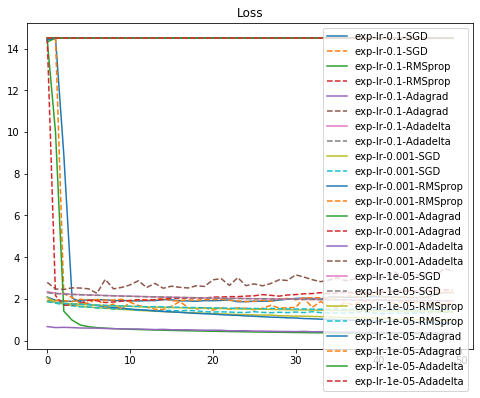

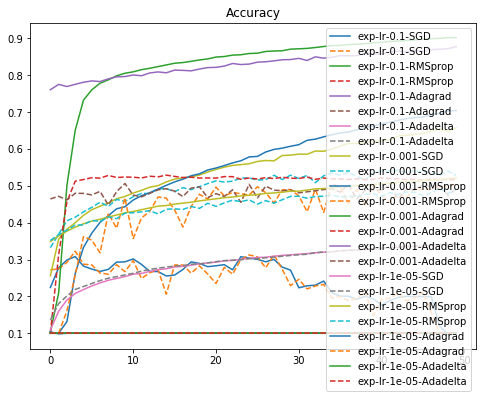

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()